In [2]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Importing the dataset and removing the variables customer ID becasue it is irrelavant to the final model
#Only annual income and spending score are essential for determinig the clusters
dataset=pd.read_csv('Mall_Customers.csv')
X=dataset.iloc[:,[3,4]].values

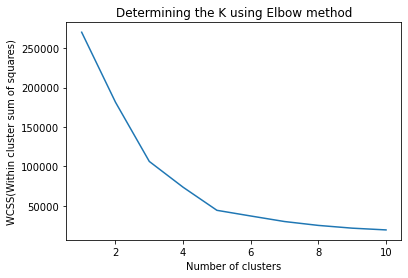

In [4]:
#Elbow method to determine the right number of clusters
#Calculating the wcss
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Determining the K using Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS(Within cluster sum of squares)')
plt.show()

In [6]:
#K=5, because after that the curve decreases slowly
#Building the Kmeans algorithm on the training the set
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)
#y_kmeans is the dependednt variable that is created after training, which has details about the cluster to which a customer belongs
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

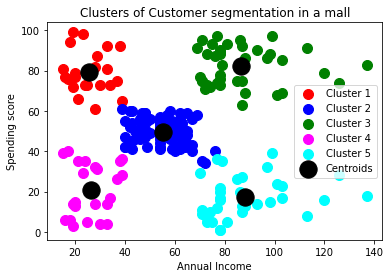

In [10]:
#Plotting the clusters(for each cluster plotting seperately)
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='magenta',label='Cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='cyan',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='black',label='Centroids')
plt.title('Clusters of Customer segmentation in a mall')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.legend()
plt.show()